# NYC taxi analysis

## Qiuyao Liu

In [142]:
import glob
import os
import numpy as np
import pandas as pd
import time,datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import linear_model
#from sklearn.model_selection import train_test_split
%matplotlib inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
fnames = glob.glob('taxi/20170*.csv')
fnames.sort()
fnames

['taxi/201701.csv',
 'taxi/201702.csv',
 'taxi/201703.csv',
 'taxi/201704.csv',
 'taxi/201705.csv',
 'taxi/201706.csv']

In [4]:
#read in the taxi data from 2017 Jan to June
files = pd.concat([pd.read_csv(f) for f in fnames], ignore_index=True)

In [5]:
files.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2017-01-01 00:01:15,2017-01-01 00:11:05,N,1,42,166,1,1.71,9.0,0.0,0.5,0.00,0.0,NaN,0.3,9.80,2,1.0
1,2,2017-01-01 00:03:34,2017-01-01 00:09:00,N,1,75,74,1,1.44,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1.0
2,2,2017-01-01 00:04:02,2017-01-01 00:12:55,N,1,82,70,5,3.45,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0
3,2,2017-01-01 00:01:40,2017-01-01 00:14:23,N,1,255,232,1,2.11,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
4,2,2017-01-01 00:00:51,2017-01-01 00:18:55,N,1,166,239,1,2.76,11.5,0.5,0.5,0.00,0.0,NaN,0.3,12.80,2,1.0


In [6]:
files.shape

(6369863, 19)

## Data Wrangling(Green Taxi Data from Jan to June, 2017)

In [195]:
taxi = files.copy()

In [196]:
taxi.shape

(6369863, 19)

In [197]:
taxi.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [198]:
taxi['pickup_datetime'] = taxi['lpep_pickup_datetime']
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])

In [199]:
taxi = taxi.set_index('pickup_datetime')

In [200]:
taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
pickup_datetime,,,,,,,,,,,,,,,,,,,
2017-01-01 00:01:15,2,2017-01-01 00:01:15,2017-01-01 00:11:05,N,1,42,166,1,1.71,9.0,0.0,0.5,0.00,0.0,NaN,0.3,9.80,2,1.0
2017-01-01 00:03:34,2,2017-01-01 00:03:34,2017-01-01 00:09:00,N,1,75,74,1,1.44,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1.0
2017-01-01 00:04:02,2,2017-01-01 00:04:02,2017-01-01 00:12:55,N,1,82,70,5,3.45,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0
2017-01-01 00:01:40,2,2017-01-01 00:01:40,2017-01-01 00:14:23,N,1,255,232,1,2.11,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
2017-01-01 00:00:51,2,2017-01-01 00:00:51,2017-01-01 00:18:55,N,1,166,239,1,2.76,11.5,0.5,0.5,0.00,0.0,NaN,0.3,12.80,2,1.0


In [140]:
taxi.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,6.369863e+06,6.369863e+06,6.369863e+06,6.369863e+06,6.369863e+06,6.369863e+06,6.369863e+06,6.369863e+06,6.369863e+06,6.369863e+06,6.369863e+06,0.0,6.369863e+06,6.369863e+06,6.369863e+06,6.369838e+06
mean,1.796818e+00,1.079554e+00,1.125331e+02,1.290692e+02,1.362785e+00,2.624924e+00,1.158730e+01,3.578310e-01,4.878118e-01,1.162110e+00,9.427015e-02,NaN,2.929739e-01,1.402838e+01,1.514760e+00,1.018750e+00
std,4.023668e-01,5.823031e-01,7.626580e+01,7.735217e+01,1.034629e+00,2.756762e+00,9.472077e+00,3.899177e-01,8.358423e-02,2.243980e+00,3.422257e+00,NaN,4.937032e-02,1.144127e+01,5.249481e-01,1.356400e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.010000e+02,-1.250000e+01,NaN,-3.000000e-01,-4.800000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,4.900000e+01,6.100000e+01,1.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,7.800000e+00,1.000000e+00,NaN
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,1.710000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.080000e+01,2.000000e+00,NaN
75%,2.000000e+00,1.000000e+00,1.670000e+02,1.930000e+02,1.000000e+00,3.230000e+00,1.400000e+01,5.000000e-01,5.000000e-01,1.960000e+00,0.000000e+00,NaN,3.000000e-01,1.679000e+01,2.000000e+00,NaN
max,2.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,9.000000e+00,1.835000e+02,3.050500e+03,1.200000e+01,8.100000e-01,4.080000e+02,7.999920e+03,NaN,3.000000e-01,8.999910e+03,5.000000e+00,2.000000e+00


Text(0.5,1,'Distribution of Fare')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


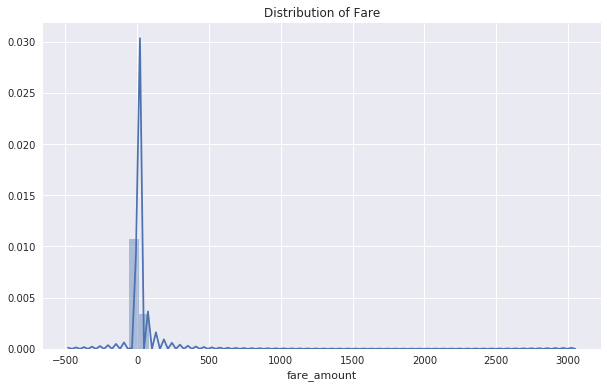

In [201]:
plt.figure(figsize = (10, 6))
sns.distplot(taxi['fare_amount'])
plt.title('Distribution of Fare')

figure 1： the plot of distribution of fare, there are negative fare amount, we need to remove those fee.

In [144]:
print("There are {} negative fares.".format(len(taxi[taxi['fare_amount'] < 0])))
print("There are {} $0 fares.".format(len(taxi[taxi['fare_amount'] == 0])))
print("There are {} fares greater than $100.".format(len(taxi[taxi['fare_amount'] > 100])))

There are 14098 negative fares.
There are 15181 $0 fares.
There are 2383 fares greater than $100.


In [145]:
taxi = taxi[taxi['fare_amount'].between(left=2.5, right=100)]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5,1,'Fare Binned')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


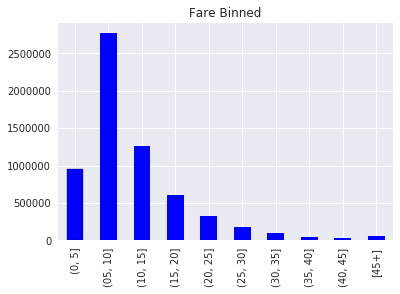

In [146]:
# Bin the fare and convert to string
taxi['fare-bin'] = pd.cut(taxi['fare_amount'], bins = list(range(0, 50, 5))).astype(str)

# Uppermost bin
taxi.loc[taxi['fare-bin'] == 'nan', 'fare-bin'] = '[45+]'

# Adjust bin so the sorting is correct
taxi.loc[taxi['fare-bin'] == '(5, 10]', 'fare-bin'] = '(05, 10]'

# Bar plot of value counts
taxi['fare-bin'].value_counts().sort_index().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Fare Binned')

figure 2: fare binned after remove the outlier

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


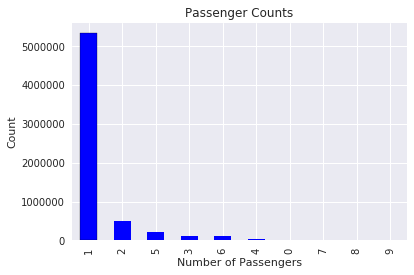

In [147]:
taxi['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Passenger Counts'); plt.xlabel('Number of Passengers'); plt.ylabel('Count');

figure 3: only keep the passenger counts are 1-6

In [149]:
taxi = taxi.loc[taxi['passenger_count'] < 6]

In [150]:
taxi.shape

(6228862, 20)

## Monthly Green Taxi Demand


In [151]:
#taxi.dropna(inplace=True)

monthly = taxi.resample('M',how=len)['VendorID']

monthly

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  app.launch_new_instance()


pickup_datetime
2017-01-31    1045784
2017-02-28    1000107
2017-03-31    1133533
2017-04-30    1058452
2017-05-31    1035939
2017-06-30     955047
Freq: M, Name: VendorID, dtype: int64

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


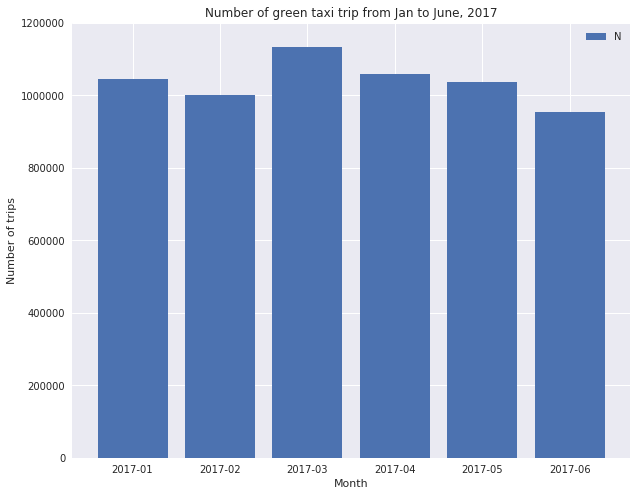

In [152]:
plt.figure(figsize=(10,8))
plt.rc('font', family='STXihei', size=15)
a = np.array([1,2,3,4,5,6])
plt.bar([1,2,3,4,5,6], monthly)
plt.xlabel('Month')
plt.ylabel('Number of trips')
plt.title('Number of green taxi trip from Jan to June, 2017')
plt.legend('Number of trips', loc='upper right')
plt.xticks(a, ('2017-01','2017-02','2017-03','2017-04','2017-05','2017-06'))
plt.ylim(0, 1200000)
plt.show()

figure 4: bar plot of the number of green taxi trip form January to June, 2017. We can see there are some difference on the the trips number. The bar plot tells us that the number of trips on January, Feburary and June are relatively lower, the usage from March to May is comparable higher. Upon on this trend, I'm taking the guess whether the demand on the taxi has any relationshp with the weather(temperature) since the winter(the coldest weather in new york is from November to March).

## The relationship taxi demand and weather

### weather from January to June, 2017

In [153]:
weather = pd.read_csv('1546210.csv')
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,...,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT11,WT11_ATTRIBUTES
0,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2017-01-01,NaN,NaN,42.0,",,7",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2017-01-02,NaN,NaN,45.0,",,7",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2017-01-03,NaN,NaN,37.0,",,7",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2017-01-04,NaN,NaN,41.0,",,7",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2017-01-05,NaN,NaN,50.0,",,7",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
weather.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'TAVG',
       'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES',
       'TOBS', 'TOBS_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES', 'WT02',
       'WT02_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04', 'WT04_ATTRIBUTES',
       'WT05', 'WT05_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES', 'WT08',
       'WT08_ATTRIBUTES', 'WT09', 'WT09_ATTRIBUTES', 'WT11',
       'WT11_ATTRIBUTES'],
      dtype='object')

In [66]:
weather['datetime'] = weather['DATE']
weather['datetime'] = pd.to_datetime(weather['datetime'])
weather = weather.set_index('datetime')

In [76]:
weather.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,LATITUDE,LONGITUDE,ELEVATION,TAVG,TMAX,TMIN,TOBS,WT01,WT02,WT03,WT04,WT05,WT05_ATTRIBUTES,WT06,WT08,WT09,WT11
count,2275.000000,2275.000000,2275.000000,543.000000,2256.000000,2257.000000,761.000000,404.0,51.0,58.0,23.0,0.0,0.0,8.0,106.0,8.0,6.0
mean,40.815111,-73.969963,35.465143,51.596685,58.587766,42.124502,45.274639,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0
std,0.116609,0.329617,35.968781,15.144609,17.106042,14.890261,15.450158,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
min,40.638600,-74.396350,2.100000,18.000000,16.000000,-7.000000,6.000000,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0
25%,40.743600,-74.283060,3.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,40.779200,-74.061390,24.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,40.883800,-73.762200,54.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,41.066940,-73.372200,115.500000,90.000000,101.000000,80.000000,92.000000,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0


In [75]:
weather.shape

(2275, 32)

In [20]:
# fill the dail avg miniumn temperature to the nan value
tmin_avg = weather['TMIN'].resample('D', how='mean')
tmin_nan = tmin_avg.loc[weather.index]
group_weather_day = tmin_nan.fillna(method='ffill')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  from ipykernel import kernelapp as app


In [21]:
#check the nan value
group_weather_day.isnull().any()

False

In [22]:
weather_day = group_weather_day.resample('D', how='mean')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


In [23]:
weather_day.shape

(181,)

### green taxi data from January to June, 2017

In [155]:
taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,fare-bin
pickup_datetime,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:01:15,2,2017-01-01 00:01:15,2017-01-01 00:11:05,N,1,42,166,1,1.71,9.0,0.0,0.5,0.00,0.0,NaN,0.3,9.80,2,1.0,"(05, 10]"
2017-01-01 00:03:34,2,2017-01-01 00:03:34,2017-01-01 00:09:00,N,1,75,74,1,1.44,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1.0,"(05, 10]"
2017-01-01 00:04:02,2,2017-01-01 00:04:02,2017-01-01 00:12:55,N,1,82,70,5,3.45,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0,"(10, 15]"
2017-01-01 00:01:40,2,2017-01-01 00:01:40,2017-01-01 00:14:23,N,1,255,232,1,2.11,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0,"(10, 15]"
2017-01-01 00:00:51,2,2017-01-01 00:00:51,2017-01-01 00:18:55,N,1,166,239,1,2.76,11.5,0.5,0.5,0.00,0.0,NaN,0.3,12.80,2,1.0,"(10, 15]"


In [156]:
#get the vendorID of each day
day = taxi.resample('D', how=len)
group_taxi_day = day['VendorID']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  from ipykernel import kernelapp as app


In [157]:
group_taxi_day.shape

(181,)

In [80]:
#group_taxi_day

### standarlize the dataset

In [158]:
scaler = preprocessing.StandardScaler().fit(weather_day)
X_standard = scaler.transform(weather_day)

scaler = preprocessing.StandardScaler().fit(group_taxi_day)
y_standard = scaler.transform(group_taxi_day)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype

In [159]:
X_standard.shape

(181,)

In [160]:
y_standard.shape

(181,)

### scatter plots of the lowest weather and the green taxi demands

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


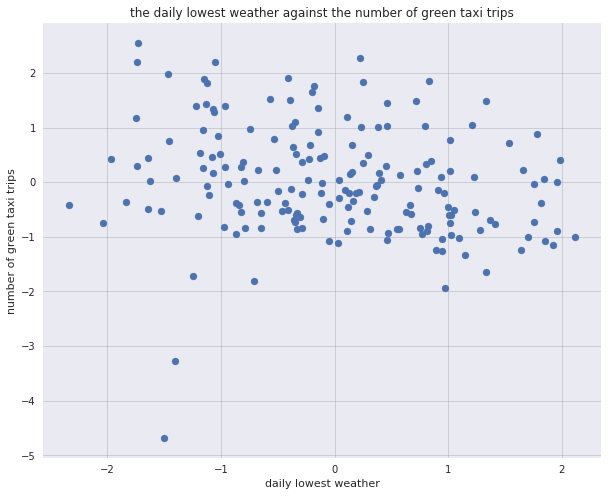

In [161]:
plt.figure(figsize=(10,8))
plt.rc('font',family='STXihei',size=15)
plt.scatter(X_standard, y_standard)
plt.xlabel('daily lowest weather')
plt.ylabel('number of green taxi trips')
plt.title('the daily lowest weather against the number of green taxi trips')
plt.grid(color='#95a5a6',linestyle='-', linewidth=1,axis='both',alpha=0.4)
plt.show()

figure 5: according to the scatter plots, the lowest temperature doesn't have the significant relationship with the number of trips. The number of taxis is consistently maintained within a fixed interval, and there is no significant change due to changes in the lowest temperature.

### Calculate R-squared score to see the correlation through the Linear Regression

In [162]:
# x is the daily lowest temperature
# y is the daily number of trips
x = np.array(weather_day)
y = np.array(group_taxi_day)

In [163]:
#need the reshape as the data is (181,), cant do the LR
x = x.reshape((181,1))
y = y.reshape((181,1))

In [164]:
lr = linear_model.LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
print('r_squared score: ', lr.score(x,y))

r_squared score:  0.0394645021197


### The r-squared score is 0.039, which is low. This explains that the independent variable has a low degree of interpretation of the dependent variable. There is no strong/significant correlation between the change of the lowest temperature and the demand on green taxi. 

In [166]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from scipy.optimize import minimize

In [167]:
data=pd.merge(pd.DataFrame(y_standard), pd.DataFrame(X_standard), left_index=True, right_index=True)

mod = smf.ols(formula = 'y_standard ~ X_standard', data=data).fit()
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:             y_standard   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     7.354
Date:                Fri, 14 Dec 2018   Prob (F-statistic):            0.00734
Time:                        01:36:58   Log-Likelihood:                -253.18
No. Observations:                 181   AIC:                             510.4
Df Residuals:                     179   BIC:                             516.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   8.327e-17      0.073   1.14e-15      1.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


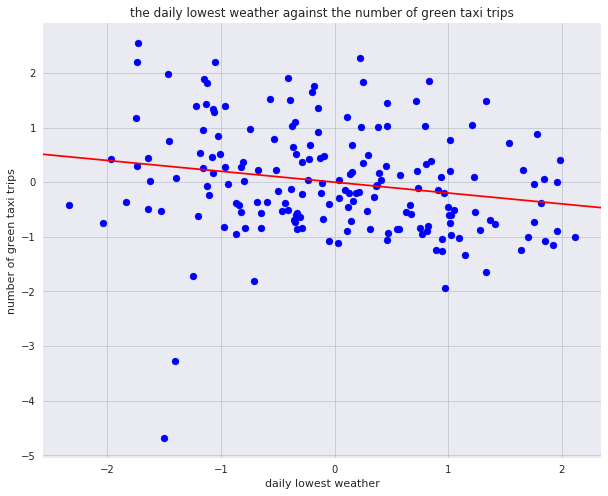

In [168]:
figure, ax=plt.subplots(figsize=(10,8))
ax.scatter(X_standard,y_standard,c='b')
abline_plot(model_results=mod, ax=ax, color='red')
plt.xlabel('daily lowest weather')
plt.ylabel('number of green taxi trips')
plt.title('the daily lowest weather against the number of green taxi trips')
plt.grid(color='#95a5a6',linestyle='-', linewidth=1,axis='both',alpha=0.4)
plt.show()

figure 6 : the scatter plot of the daily lowest weather against the number of green taxi trips and the line fit to the model.

## time series analysis on taxi demand

In [169]:
taxi.head().index

DatetimeIndex(['2017-01-01 00:01:15', '2017-01-01 00:03:34',
               '2017-01-01 00:04:02', '2017-01-01 00:01:40',
               '2017-01-01 00:00:51'],
              dtype='datetime64[ns]', name='pickup_datetime', freq=None)

In [170]:
daily_demand = taxi['VendorID'].resample('D').sum()

In [171]:
daily_demand.head().index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', name='pickup_datetime', freq='D')

In [172]:
#daily_demand['2017-01':'2017-02']

In [173]:
df = pd.DataFrame(daily_demand)
df.rename(columns={'VendorID': 'demand'}, inplace=True)
df.head()

,demand
pickup_datetime,
2017-01-01,72228
2017-01-02,42971
2017-01-03,54211
2017-01-04,56049
2017-01-05,61057


### Event detection

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


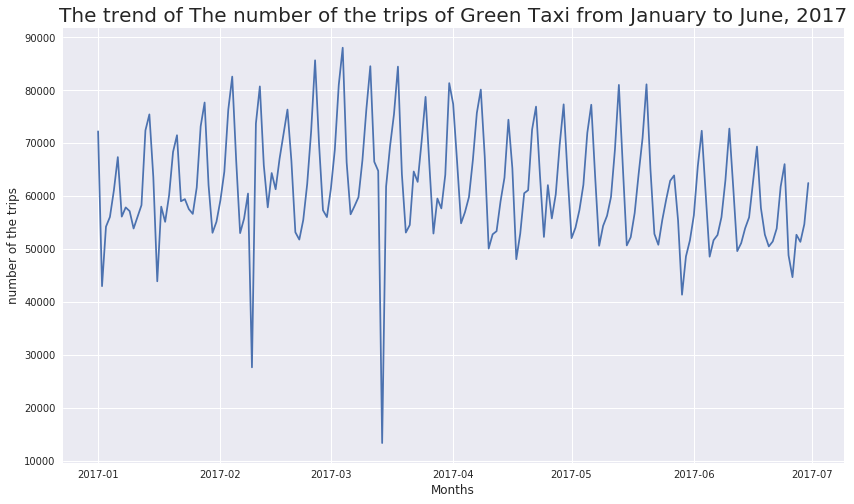

In [174]:
plt.figure(figsize=(14,8))
plt.plot(df)
plt.xlabel('Months', fontsize=12)
plt.ylabel('number of the trips', fontsize=12)
plt.title('The trend of The number of the trips of Green Taxi from January to June, 2017', fontsize=20)
plt.show()

### figure 7:there is the increasing trend from January to March and then decreasing trend from March to June. We could see there is a very low demand on March, 2017 bewteen 10th, March and 15th. I check the calendar that the daylight saving time start from 10th, March. There is one hour less than the previous day, so the very low demand on green taxi is because there is less one hour count for 10th March.

### Hourly trend(weekday and weekend) 2017-02-15 and 2017-04-08

In [175]:
taxi1 = pd.DataFrame(pd.read_csv('taxi/201701.csv'))
taxi1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2017-01-01 00:01:15,2017-01-01 00:11:05,N,1,42,166,1,1.71,9.0,0.0,0.5,0.00,0.0,NaN,0.3,9.80,2,1
1,2,2017-01-01 00:03:34,2017-01-01 00:09:00,N,1,75,74,1,1.44,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
2,2,2017-01-01 00:04:02,2017-01-01 00:12:55,N,1,82,70,5,3.45,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1
3,2,2017-01-01 00:01:40,2017-01-01 00:14:23,N,1,255,232,1,2.11,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1
4,2,2017-01-01 00:00:51,2017-01-01 00:18:55,N,1,166,239,1,2.76,11.5,0.5,0.5,0.00,0.0,NaN,0.3,12.80,2,1


In [176]:
time_split = pd.DataFrame((x.split(' ') for x in taxi1.lpep_pickup_datetime),
                          index=taxi1.index,
                          columns=['pickup_date', 'pickup_time'])

In [177]:
time_split.head()

,pickup_date,pickup_time
0,2017-01-01,00:01:15
1,2017-01-01,00:03:34
2,2017-01-01,00:04:02
3,2017-01-01,00:01:40
4,2017-01-01,00:00:51


In [178]:
taxi1=pd.merge(taxi1,time_split,right_index=True, left_index=True)

In [179]:
taxi1['pickup_time']=pd.to_datetime(taxi1['pickup_time'])

In [180]:
taxi1 = taxi1.set_index('pickup_time')

In [181]:
pickup_time = taxi1.resample('H', how=len)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


In [182]:
group_pickup_time = pickup_time['VendorID']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


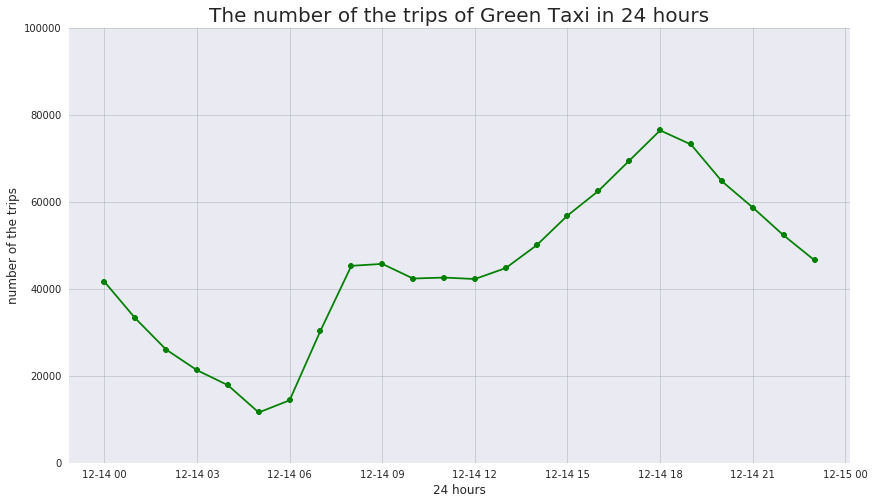

In [183]:
plt.figure(figsize=(14,8))
plt.rc('font',size=9)
plt.plot(group_pickup_time, 'g8',group_pickup_time,'g-')
plt.xlabel('24 hours', fontsize=12)
plt.ylabel('number of the trips', fontsize=12)
plt.title('The number of the trips of Green Taxi in 24 hours', fontsize=20)
plt.ylim(0, 100000)
plt.grid(color='#95a5a6',linestyle='-', linewidth=1,axis='both',alpha=0.4)
plt.show()

### figure 8: From the 24-hour trips trend plot, the night time, from 6pm, is the peak of the use of Green TAXI. The amount of taxis used in the evening was significantly higher than in the morning, and the duration of high demand is longer, from the peak of the car at 7 PM in the evening to the midnight.

## Stationnarity, smoothing

In [184]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [205]:
def test_stationarity(ts, size):
    #fig = plt.figure(figsize=(10,12))
    
    rol_mean = ts.rolling(window=size, center=False).mean()
    #rol_weighted_mean = pd.ewma(ts, span=size)
    rol_std = ts.rolling(window=size, center=False).std()
    
    plt.figure(figsize=(14,8))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rol_mean, color='red', label='Rolling Mean')
    std = plt.plot(rol_std, color='black', label = 'Rolling Std')
    #wmean = plt.plot(rol_weighted_mean, color='green', label='rolling weighted mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


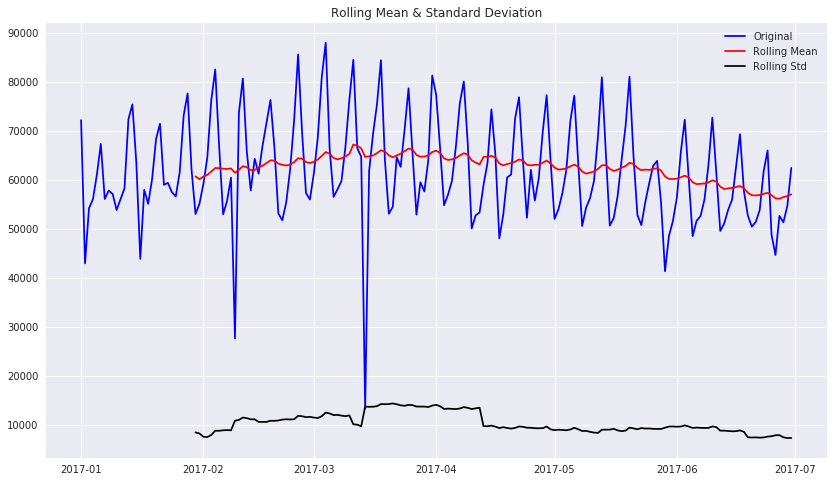

Results of Dickey-Fuller Test:
Test Statistic                  -0.658473
p-value                          0.857215
#Lags Used                      13.000000
Number of Observations Used    167.000000
Critical Value (1%)             -3.470126
Critical Value (5%)             -2.879008
Critical Value (10%)            -2.576083
dtype: float64


In [206]:
test_stationarity(df['demand'],30)

### figure 9: This is not a stationary series. the test statistics is way more than the critical values

### Estimating & Eliminating Trend

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


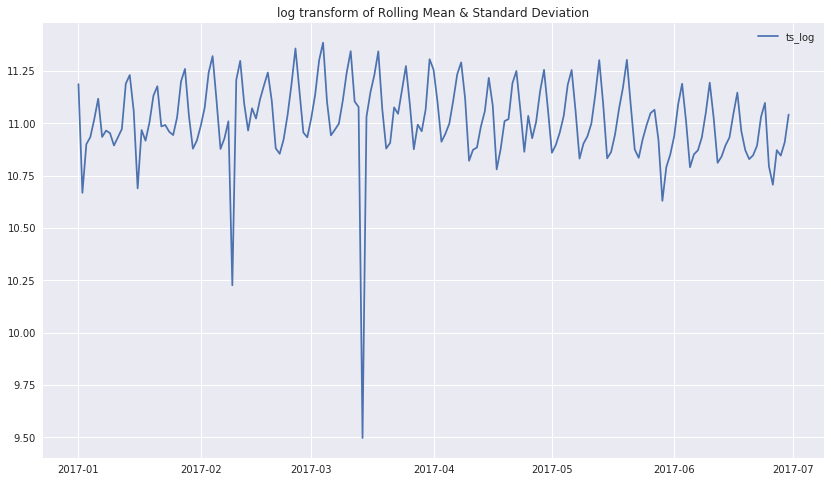

In [203]:
ts_log = np.log(df)
plt.figure(figsize=(14,8))
plt.plot(ts_log, label='ts_log')
plt.legend(loc='best')
plt.title('log transform of Rolling Mean & Standard Deviation')
plt.show(block=False)

figure 10: log transformation of trend

### Moving average

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=30).mean()
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


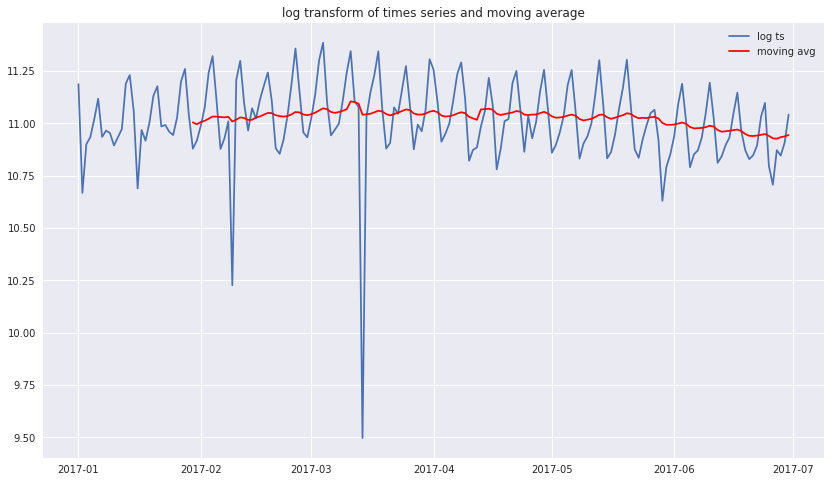

In [204]:
moving_avg = pd.rolling_mean(ts_log, 30)
plt.figure(figsize=(14,8))
plt.plot(ts_log, label='log ts')
plt.plot(moving_avg, color='red', label='moving avg')
plt.legend(loc='best')
plt.title('log transform of times series and moving average')
plt.show(block=False)

figure 11:plot of the moving average with time series

In [189]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

,demand
pickup_datetime,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


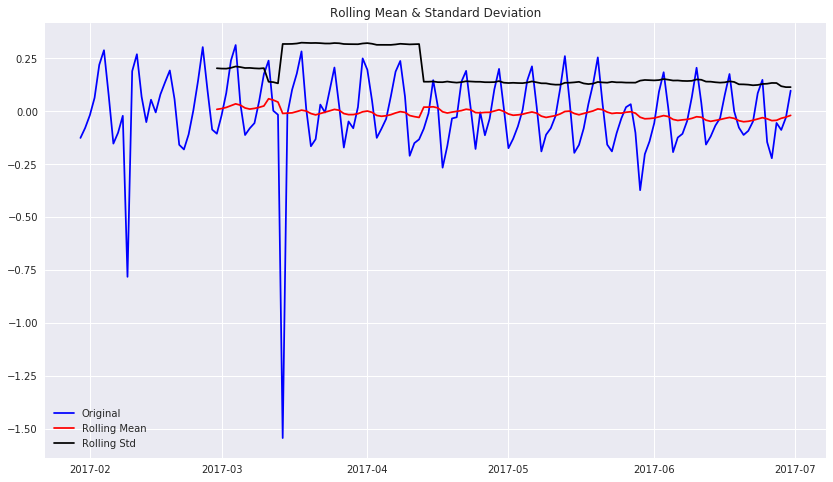

Results of Dickey-Fuller Test:
Test Statistic                  -4.305743
p-value                          0.000434
#Lags Used                       6.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


In [207]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff['demand'], 30)

figure 12: the test statistics is -4.3 and the p-value is close to 0, however, p-value is still larger than the crtical value of 5%, we can't reject the null hypothesis, the time series is stil non-stationality